Importamos las librerías necesarias.

In [ ]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset y preparamos los datos para analizarlos.

In [174]:
hi_data = pd.read_csv("train.csv")
hi_data_no_modified = pd.read_csv("train.csv")

Mostramos el tipo de datos en cada columna y los primeros registros para entender el dataset.

In [175]:
print (hi_data.dtypes)
hi_data.head()

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Revisamos la variable objetivo, es decir, la columna `Response` y como se distribuye.

In [176]:
categorias = hi_data['Response'].unique()
print("Categories:", categorias)
print(hi_data['Response'].value_counts())

Categories: [1 0]
Response
0    334399
1     46710
Name: count, dtype: int64


Ahora pasamos a revisar si hay NaNs, para ello calculamos la cantidad de valores nulos por columna y en todo el dataset.

In [177]:
print(hi_data.isna().sum())
print()
print("Per lo tant, total de NaNs: ", hi_data.isna().sum().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Per lo tant, total de NaNs:  0


Al ver que no tenemos NaNs podemos pasar a analizar la correlación, por lo que calculamos la correlación de los atributos numéricos con la variable objetivo `Response`.

Correlación entre cada atributo y la variable objetivo (Response):
id                     -0.001368
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Name: Response, dtype: float64


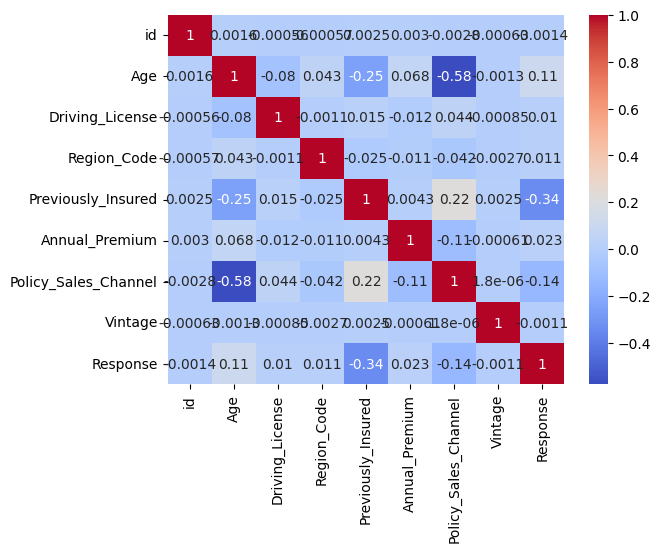

In [178]:
target = 'Response'
numeric_attributes = hi_data.select_dtypes(include=[np.number]).columns.tolist()
attributes = [k for k in numeric_attributes if k != target]

correlations = hi_data[attributes + [target]].corr()[target].drop(target)

print("Correlación entre cada atributo y la variable objetivo (Response):")
print(correlations)
sns.heatmap(hi_data[attributes + [target]].corr(), annot=True, cmap="coolwarm")
plt.show()

Ya podemos empezar a centrarnos en la transformación de los datos y lo hacemos eliminando columnas que creemos poco útiles y que creemos que no aportan significativamente al análisis. Para escoger estas columnas nos basamos en el resultado del heatmap y decidimos eliminar `id`, `Driving_License`, `Region_Code` y `Vintage`.

In [179]:
drop_column = ['id','Driving_License','Region_Code','Vintage']
hi_data.drop(drop_column, axis=1, inplace = True)
hi_data

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,Male,44,0,> 2 Years,Yes,40454.0,26.0,1
1,Male,76,0,1-2 Year,No,33536.0,26.0,0
2,Male,47,0,> 2 Years,Yes,38294.0,26.0,1
3,Male,21,1,< 1 Year,No,28619.0,152.0,0
4,Female,29,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,Male,74,1,1-2 Year,No,30170.0,26.0,0
381105,Male,30,1,< 1 Year,No,40016.0,152.0,0
381106,Male,21,1,< 1 Year,No,35118.0,160.0,0
381107,Female,68,0,> 2 Years,Yes,44617.0,124.0,0


Para poder continuar realizamos la codificación de las variables categóricas, que en nuestro caso son `Gender`, `Vehicle_Age`, `Vehicle_Damage` para convertirlas a valores numéricos.

Empezamos con `Gender` pasando a 0 si es 'Male' y a 1 si es 'Female', por lo que al final los valores serán [0 1]

In [180]:
hi_data['Gender'] = hi_data['Gender'].map({'Male': 0, 'Female': 1})
print(hi_data[['Gender']].head())
print(hi_data['Gender'].unique())

   Gender
0       0
1       0
2       0
3       0
4       1
[0 1]


En el caso de `Vehicle_Age` encontramos 3 posibilidades, por lo que los posibles valores deben ser [2 1 0], siendo 0 para '< 1 Year', 1 para '1-2 Year' y 2 para '> 2 Years'.

In [181]:
hi_data['Vehicle_Age'] = hi_data['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
print(hi_data[['Vehicle_Age']].head())
print(hi_data['Vehicle_Age'].unique())

   Vehicle_Age
0            2
1            1
2            2
3            0
4            0
[2 1 0]


Para `Vehicle_Damage` tenemos 2 casos posibles, que son 'Yes', el cual transformaremos en 1 y 'No', que transformaremos en 0; así obtenemos las posibilidades [1 0].

In [182]:
hi_data['Vehicle_Damage'] = hi_data['Vehicle_Damage'].map({'No': 0, 'Yes': 1})
print(hi_data[['Vehicle_Damage']].head())
print(hi_data['Vehicle_Damage'].unique())

   Vehicle_Damage
0               1
1               0
2               1
3               0
4               0
[1 0]


Para ver la tabla después de las correcciones anteriores la volvemos a mostrar.

In [183]:
hi_data

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,0,44,0,2,1,40454.0,26.0,1
1,0,76,0,1,0,33536.0,26.0,0
2,0,47,0,2,1,38294.0,26.0,1
3,0,21,1,0,0,28619.0,152.0,0
4,1,29,1,0,0,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,0,74,1,1,0,30170.0,26.0,0
381105,0,30,1,0,0,40016.0,152.0,0
381106,0,21,1,0,0,35118.0,160.0,0
381107,1,68,0,2,1,44617.0,124.0,0


Además para entender mejor la distribución de valores por columna mostramos histogramas.

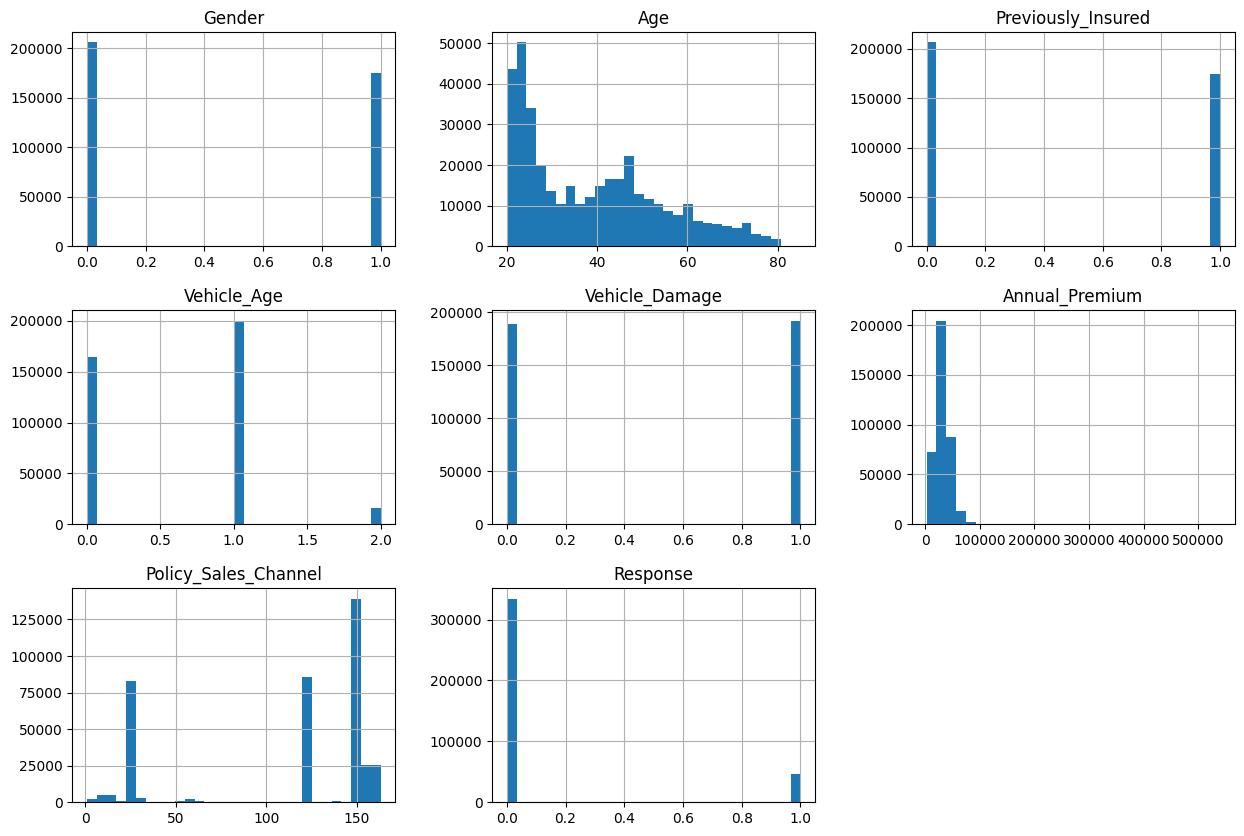

In [184]:
hi_data.hist(bins=30, figsize=(15, 10))
plt.show()

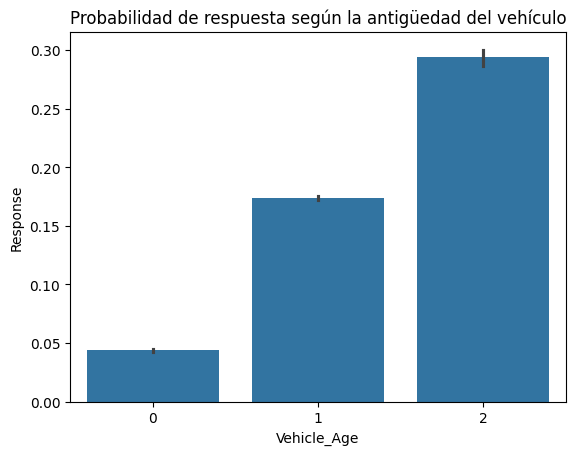

In [185]:
sns.barplot(x="Vehicle_Age", y="Response", data=hi_data)
plt.title("Probabilidad de respuesta según la antigüedad del vehículo")
plt.show()

La mitjana de persones que estan interessades es: 12.256336113815209 %


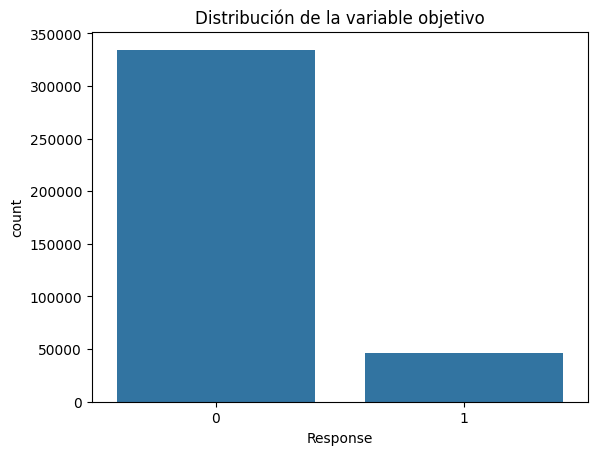

In [186]:
print("La mitjana de persones que estan interessades es:", (hi_data[target].mean())*100, "%")
sns.countplot(x=target, data=hi_data)
plt.title("Distribución de la variable objetivo")
plt.show()

Al ver la gran diferencia en `Response` de 0 y 1 decidimos hacer oversampling para obtener resultados más precisos.

Dividimos los datos en conjuntos de entrenamiento y prueba.

In [187]:
from sklearn.model_selection import train_test_split
X = hi_data.drop(columns=['Response'])
y = hi_data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Aplicamos oversampling con SMOTE para balancear las clases.

In [188]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunt d'entrenament
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribució de classes després d'aplicar SMOTE:")
print(y_train_smote.value_counts())

Distribució de classes després d'aplicar SMOTE:
Response
1    267700
0    267700
Name: count, dtype: int64


Decidimos normalizamos columnas numéricas para mejorar el rendimiento del modelo, tanto los datos SMOTE como sin SMOTE.

In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_smote[['Age', 'Annual_Premium', 'Policy_Sales_Channel']] = scaler.fit_transform(
    X_train_smote[['Age', 'Annual_Premium', 'Policy_Sales_Channel']]
)
X_test[['Age', 'Annual_Premium', 'Policy_Sales_Channel']] = scaler.transform(
    X_test[['Age', 'Annual_Premium', 'Policy_Sales_Channel']]
)

In [190]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Age', 'Annual_Premium', 'Policy_Sales_Channel']] = scaler.fit_transform(
    X_train[['Age', 'Annual_Premium', 'Policy_Sales_Channel']]
)
X_test[['Age', 'Annual_Premium', 'Policy_Sales_Channel']] = scaler.transform(
    X_test[['Age', 'Annual_Premium', 'Policy_Sales_Channel']]
)

Una vez todo listo pasamos a entrenar modelos de clasificación y empezamos la regresión logística con oversampling.

In [191]:
from sklearn.linear_model import LogisticRegression

# Entrenar el model amb les dades SMOTE
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# Prediccions al conjunt de test original
y_pred = model.predict(X_test)

# Avaluar el model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# AUC-ROC per veure el rendiment del model
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.6087350108892445
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     66699
           1       0.24      0.99      0.39      9523

    accuracy                           0.61     76222
   macro avg       0.62      0.77      0.55     76222
weighted avg       0.90      0.61      0.67     76222

AUC-ROC: 0.8196366004743291


Después de ver los resultados decidimos probar sin oversampling para ver las diferencias que podriamos haber obtenido.

In [192]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [193]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7713914617826874
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     66699
           1       0.29      0.57      0.39      9523

    accuracy                           0.77     76222
   macro avg       0.61      0.69      0.62     76222
weighted avg       0.85      0.77      0.80     76222



Observem que els resultats varien si fem servir o no oversampling.

Ara comprovem amb altres models: Random Forest, Gradient Boosting y KNN.

In [194]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Modelos optimizados para entrenar
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=50, max_depth=10, random_state=42, class_weight='balanced'
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42
    ),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
    print()



--- Random Forest ---
Accuracy: 0.8750623179659416
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

AUC-ROC: 0.809301932278061

--- Gradient Boosting ---
Accuracy: 0.8750623179659416
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

AUC-ROC: 0.770366109127192

--- KNN ---
Accuracy: 0.7812442601873475
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     66699
           1       0.29      0.52 

Comparació de corves ROC de cada model.

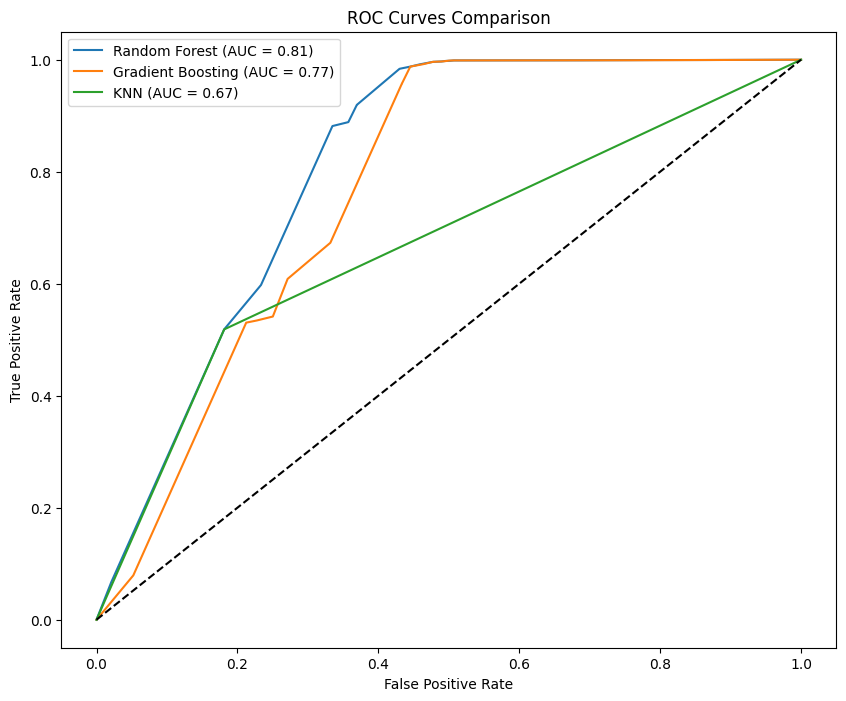

In [195]:
from sklearn.metrics import roc_curve, auc

# Curvas ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()


Feature Importance (Random Forest):
                Feature  Importance
2    Previously_Insured    0.390957
4        Vehicle_Damage    0.262029
1                   Age    0.149441
6  Policy_Sales_Channel    0.107288
0                Gender    0.052939
3           Vehicle_Age    0.022373
5        Annual_Premium    0.014973


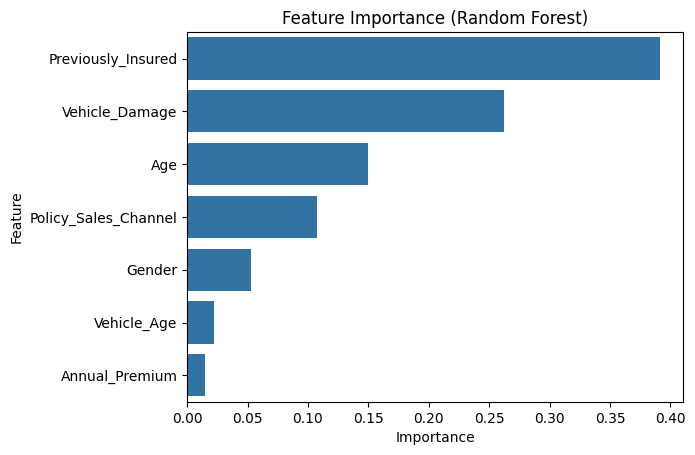

In [196]:
# Feature Importance para Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

# Visualización
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()

Realitzem una cerca d'hiperparàmetres per Random Forest utilitzant RandomizedSearch.

In [197]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='roc_auc',
    n_iter=10,  # Número de combinaciones a probar
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train_smote, y_train_smote)

print("Best parameters found:")
print(random_search.best_params_)
print("Best AUC-ROC:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best AUC-ROC: 0.9146372610928643


Realitzem una cerca d'hiperparàmetres per Random Forest utilitzant GridSearch.

In [198]:
from sklearn.model_selection import GridSearchCV

# Hiperparámetros reducidos para evitar largos tiempos
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1  # Usar múltiples núcleos
)

grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters found:")
print(grid_search.best_params_)
print("Best AUC-ROC:", grid_search.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best AUC-ROC: 0.9143862130928587


Cross-Validation.

In [199]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    RandomForestClassifier(**random_search.best_params_, random_state=42),
    X_train_smote,
    y_train_smote,
    scoring='roc_auc',
    cv=5  # Número de particiones
)
print("AUC-ROC scores:", scores)
print("Mean AUC-ROC:", scores.mean())

AUC-ROC scores: [0.86490115 0.92816402 0.92968591 0.9286356  0.92768042]
Mean AUC-ROC: 0.9158134182089601


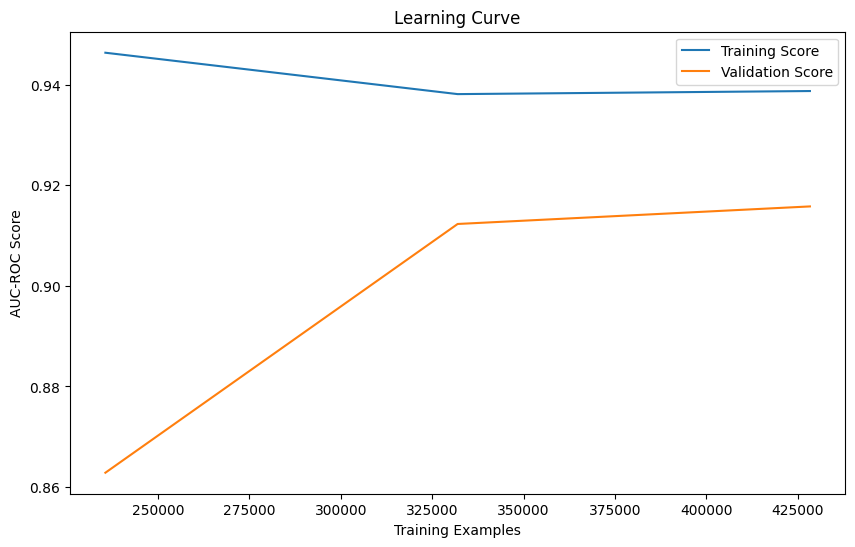

In [200]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(**random_search.best_params_, random_state=42),
    X_train_smote,
    y_train_smote,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel("Training Examples")
plt.ylabel("AUC-ROC Score")
plt.legend()
plt.title("Learning Curve")
plt.show()

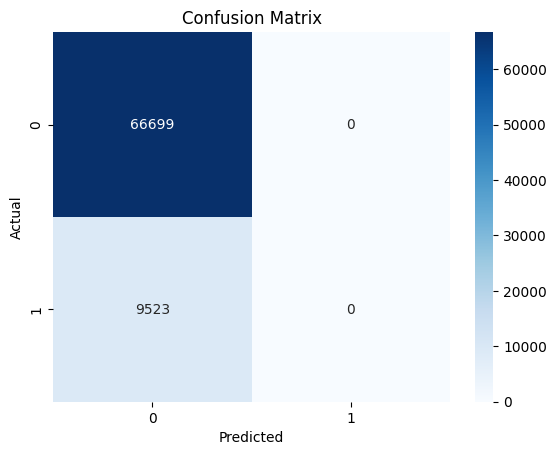

In [201]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = random_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [202]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



c:\Users\pauwh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pauwh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pauwh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo